In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from os.path import join

c:\Users\Mumu\miniconda3\envs\crime_patterns\Lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
c:\Users\Mumu\miniconda3\envs\crime_patterns\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Mumu\miniconda3\envs\crime_patterns\Lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
### center, dispersion, and clustering of crime

In [3]:
data_dir = r"C:\Users\Mumu\Desktop\Bonn Econ\Winter22-23\EPP\crime_patterns\bld\python\data"

In [5]:
db = pd.read_csv(join(data_dir, r"city-of-london-crimes-2020-2022-cleaned.csv"))

In [6]:
db.head()

,Month,Reported by,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2020-02,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Anti-social behaviour
1,2020-02,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Anti-social behaviour
2,2020-02,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft
3,2020-02,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person
4,2020-02,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17809 entries, 0 to 17808
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        17809 non-null  object 
 1   Reported by  17809 non-null  object 
 2   Longitude    17809 non-null  float64
 3   Latitude     17809 non-null  float64
 4   Location     17809 non-null  object 
 5   LSOA code    17809 non-null  object 
 6   LSOA name    17809 non-null  object 
 7   Crime type   17809 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.1+ MB


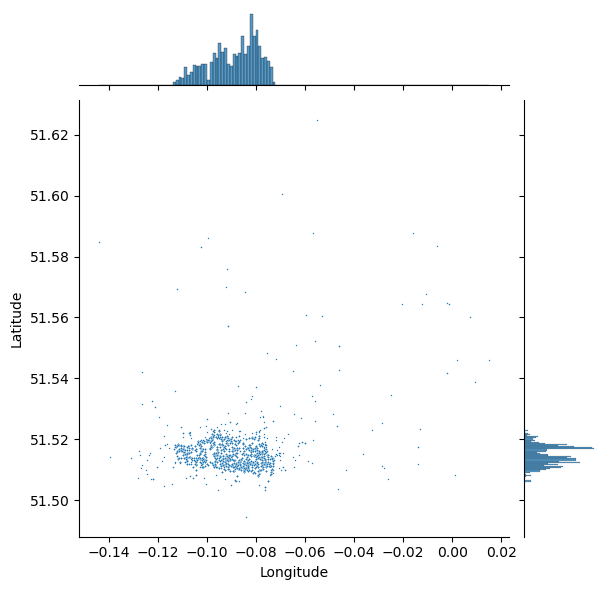

In [10]:
# Generate scatter plot
seaborn.jointplot(x="Longitude", y="Latitude", data=db, s=1.0)

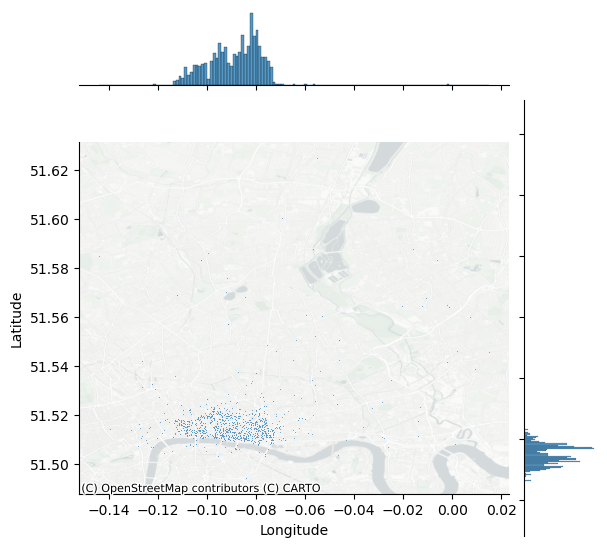

In [12]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="Longitude", y="Latitude", data=db, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
)

C:\Users\Mumu\AppData\Local\Temp\ipykernel_3692\3608229222.py:6: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  seaborn.kdeplot(
C:\Users\Mumu\AppData\Local\Temp\ipykernel_3692\3608229222.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(
c:\Users\Mumu\miniconda3\envs\crime_patterns\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


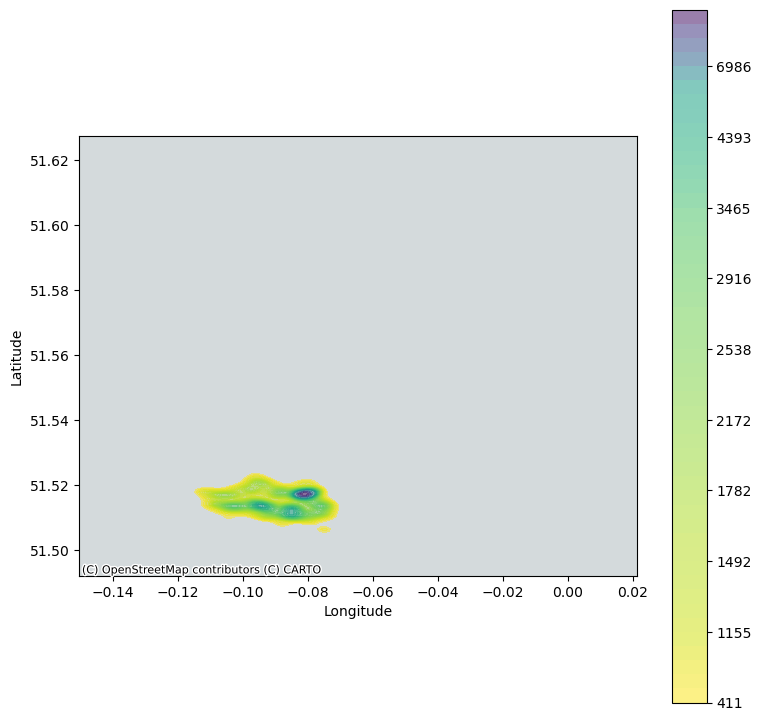

In [14]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    data = db,
    x = db["Longitude"],
    y = db["Latitude"],
    n_levels=50,
    shade=True,
    alpha=0.55,
    cmap="viridis_r",
    cbar=True, 
    shade_lowest=False
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
#ax.set_axis_off()

In [15]:
from pointpats import centrography

In [16]:
mean_center = centrography.mean_center(db[["x", "y"]])
med_center = centrography.euclidean_median(db[["x", "y"]])

In [18]:
mean_center

array([15555485.40274061,  4255558.40964842])

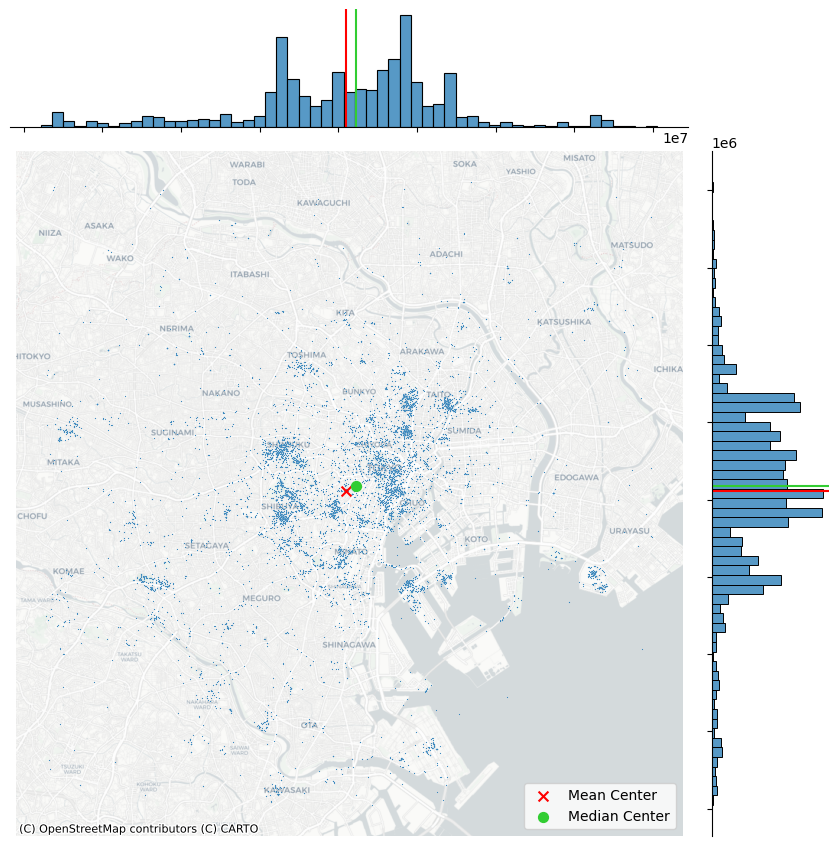

In [17]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="x", y="y", data=db, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color="red", marker="x", s=50, label="Mean Center"
)
joint_axes.ax_marg_x.axvline(mean_center[0], color="red")
joint_axes.ax_marg_y.axhline(mean_center[1], color="red")
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center,
    color="limegreen",
    marker="o",
    s=50,
    label="Median Center"
)
joint_axes.ax_marg_x.axvline(med_center[0], color="limegreen")
joint_axes.ax_marg_y.axhline(med_center[1], color="limegreen")
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, source=contextily.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [ ]:
'''
## TODO:
1. calculate tightest alpha shape
2. calculate quadrat count
3. DBSCAN clustering of points 
4. clustering along networks



'''